In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
df = pd.read_csv('data.csv')

In [44]:
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [45]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [46]:
#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'diagnosis':'Label'})
print(df.dtypes)

id                           int64
Label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [47]:
df.fillna(value=0,inplace=True)

In [48]:
####### Replace categorical values with numbers########
print("Distribution of data: ", df['Label'].value_counts())

#Define the dependent variable that needs to be predicted (labels)
y = df["Label"].values
print("Labels before encoding are: ", np.unique(y))

# Encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("Labels after encoding are: ", np.unique(Y))

Distribution of data:  B    357
M    212
Name: Label, dtype: int64
Labels before encoding are:  ['B' 'M']
Labels after encoding are:  [0 1]


In [49]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data
X = df.drop(labels = ["Label", "id"], axis=1) 
print(X.describe().T) #Needs scaling

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

In [50]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #Scaled values

[[0.52103744 0.0226581  0.54598853 ... 0.59846245 0.41886396 0.        ]
 [0.64314449 0.27257355 0.61578329 ... 0.23358959 0.22287813 0.        ]
 [0.60149557 0.3902604  0.59574321 ... 0.40370589 0.21343303 0.        ]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.12872068 0.1519087  0.        ]
 [0.64456434 0.66351031 0.66553797 ... 0.49714173 0.45231536 0.        ]
 [0.03686876 0.50152181 0.02853984 ... 0.25744136 0.10068215 0.        ]]


In [51]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (426, 31)
Shape of testing data is:  (143, 31)


In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [54]:
# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [55]:
# setting up the layers of Neural Network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(31,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [56]:
# compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 31)                0         
                                                                 
 dense_4 (Dense)             (None, 20)                640       
                                                                 
 dense_5 (Dense)             (None, 2)                 42        
                                                                 
Total params: 682
Trainable params: 682
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train_std, y_train, verbose=1, epochs=100, batch_size=60, validation_data=(X_test_std, y_test))

Epoch 1/100
8/8 [==============================] - 1s 27ms/step - loss: 0.8961 - accuracy: 0.4765 - val_loss: 0.8106 - val_accuracy: 0.5105
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7025 - accuracy: 0.6127 - val_loss: 0.6304 - val_accuracy: 0.6643
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5622 - accuracy: 0.7089 - val_loss: 0.4953 - val_accuracy: 0.7622
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4613 - accuracy: 0.7958 - val_loss: 0.4034 - val_accuracy: 0.8392
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3892 - accuracy: 0.8662 - val_loss: 0.3418 - val_accuracy: 0.8951
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3397 - accuracy: 0.8944 - val_loss: 0.2995 - val_accuracy: 0.9231
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.3032 - accuracy: 0.9038 - val_loss: 0.2674 - val_accuracy: 0.9301
Epoch 8/100
8/8 [=========

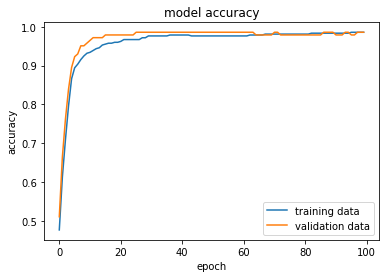

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

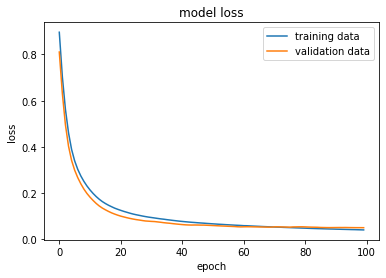

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

# Accuracy of the model on test data

In [61]:
loss, accuracy = model.evaluate(X_test_std, y_test)
print(accuracy)

5/5 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9860
0.9860140085220337
